<h1 align='center'>Automatizando ELT con GitHub Actions</h1>

<h4 align='center'>Laura G. Funderburk </h4>

<h4 align='center'>Repo: https://github.com/lfunderburk/automate-elt-github/ </h4>

<h3 align='center'>Herramientas con las que trabajaremos durante este taller</h3>

* Tipos de bases de datos: DuckDB y Amazon Redshift
* Herramientas para Análisis Exploratorio de Datos (EDA): Cuadernos Jupyter y JupySQL
* Diseño y orquestación de pipelines: Archivos YAML y Ploomber
* Integración Continua y Despliegue Continuo (CI/CD): introduciremos cómo configurar GitHub Actions y cómo estructurarlos.

**Puedes modificar los pasos anteriores para trabajar con tus tipos de bases de datos preferidos y métodos de orquestación de pipelines**

<h3 align='center'>Pipeline ejemplo</h3>


![](images/etl-diagram.jpg)

<h2 align='center'>Sección 1: Introducción a ELT </h2>


<h3 align='center'>¿Qué es ELT?</h3>

ETL significa Extracción, Carga (Load) y Transformación.

* Extraes datos brutos de varias fuentes
* Los cargas en su estado natural en un almacén de datos o lago de datos
* Lo transformas según sea necesario mientras está en el sistema objetivo

Con ELT, toda la limpieza, transformación y enriquecimiento de datos ocurre dentro del almacén de datos. Puedes interactuar y transformar los datos brutos tantas veces como sea necesario.

<h3 align='center'> ¿Por qué es importante ETL?</h3>

Los procesos ETL son cruciales para el análisis de datos y la inteligencia empresarial. Aseguran que los datos sean precisos, consistentes y estén disponibles de manera oportuna para el análisis.


<h3 align='center'> ELT vs ETL</h3>

Extraer, transformar y cargar (ETL) y extraer, cargar y transformar (ELT) son dos enfoques de procesamiento de datos para análisis.

El enfoque ETL utiliza un conjunto de reglas empresariales para procesar datos de varias fuentes antes de la integración centralizada.

El enfoque ELT carga los datos tal como están y los transforma en una etapa posterior, dependiendo del caso de uso y los requisitos analíticos.


<h3 align='center'> Resumen de JupySQL</h3>

JupySQL es una extensión de Jupyter diseñada para hacer que los procesos ETL basados en SQL sean fluidos dentro de los cuadernos Jupyter. Con JupySQL, puedes:

* Ejecutar consultas SQL directamente desde tu cuaderno Jupyter.
* Integrar resultados SQL con código Python y bibliotecas como Pandas.
* Visualizar los resultados de la consulta SQL utilizando las capacidades de visualización de Jupyter.

<h3 align='center'> Beneficios de JupySQL</h3>

* Simplicidad: No es necesario cambiar entre herramientas SQL y Jupyter. Todo se puede hacer en un solo lugar.
* Flexibilidad: Combina el poder de SQL con las capacidades de manipulación de datos de Python.
* Compatibilidad: JupySQL es compatible con todas las principales bases de datos (por ejemplo, PostgreSQL, MySQL, SQL Server), almacenes de datos (por ejemplo, Snowflake, BigQuery, Redshift) y motores integrados (SQLite y DuckDB).


<h3 align='center'> Resumen de DuckDB</h3>

DuckDB es un sistema de gestión de bases de datos (DBMS) de procesamiento analítico en línea (OLAP) relacional, incrustado, en proceso, gratuito y de código abierto.

* Las características de DBMS se ejecutan desde dentro de la aplicación a la que estás intentando acceder en lugar de un proceso externo al que se conecta tu aplicación.

* OLAP significa que la base de datos está diseñada para análisis de datos.


<h3 align='center'> Resumen de Amazon Redshift</h3>

AWS Redshift es un servicio de almacenamiento de datos a escala de petabytes basado en la nube ofrecido como una de las soluciones de datos del ecosistema de Amazon.

Es un sistema de gestión de bases de datos relacionales (RDBMS) y un tipo de sistema de base de datos OLAP.

<h3 align='center'> OLAP vs OLTP</h3>

$\Rightarrow$ ¿Cómo se almacenan los datos?

Las bases de datos OLTP comúnmente almacenan datos por **registros** asegurando que todos los datos asociados con un registro se almacenen juntos en memoria. También están optimizadas para leer y escribir filas de manera eficiente.

Las bases de datos OLAP están comúnmente orientadas por **columnas**, lo que significa que los datos están organizados por columnas. Todos los datos asociados con una columna se almacenan cerca uno del otro en memoria, y la base de datos está optimizada para leer y calcular en las columnas de manera eficiente.

<h3 align='center'> Datos con los que trabajaremos </h3>


```{important}
Source: UCI Machine Learning Repository

URL: https://web.archive.org/web/20070214120527/http://lisp.vse.cz/pkdd99/DATA/data_berka.zip

```

<h2 align='center'>Sección 2: Ejemplo de trabajo de extracción, carga y manipulación de datos</h2>

<h3 align='center'> Extracción de datos </h3>

Podemos configurar un script simple para extraer los datos con Python. Los datos se pueden extraer a través de una URL que descargará una carpeta .zip.

Los pasos clave en la extracción son:

1. Descargar los datos a través de urllib.request
2. Descomprimir el contenido de la carpeta descargada
3. Escribir el contenido de la carpeta en archivos


<h3 align='center'> Descarga y extracción de datos</h3>

Recomendación: crea un script extractdata.py con tus funciones para extraer y analizar los datos. Echemos un vistazo a un script de muestra.

https://github.com/lfunderburk/automate-elt-github/blob/main/pipeline/etl/extractdata.py

<h3 align='center'>Inicializando el proceso de orquestación del pipeline</h3>


Para este taller, empaquetaré mis pipelines con Ploomber, lo que me permite combinar scripts de Python, scripts de SQL e incluso cuadernos Jupyter como parte del pipeline.

En el núcleo de los pipelines de Ploomber están los archivos yaml. Aquí se puede encontrar un ejemplo de pipeline:

El archivo `pipeline.yaml`:

```yaml
tasks:
  - source: etl/extractdata.py
    product:
      nb: products/extract-pipeline.ipynb
```


<h3 align='center'>Estructura del directorio - antes de ejecutar el pipeline</h3>

```bash
pipeline/
├──pipeline.yaml
├──pyproject.toml
├──README.md
├──etl/
├──├── extractdata.py
├──products/
```

<h3 align='center'>Ejecutando el pipeline</h3>

```bash
$ cd pipeline/
$ poetry run ploomber build
```

This yields:

```bash
Loading pipeline...
Executing: 100%|█████████████████████████████████████████████████████████████████| 5/5 [00:09<00:00,  1.87s/cell]
Building task 'extractdata': 100%|█████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.34s/it]
name         Ran?      Elapsed (s)    Percentage
-----------  ------  -------------  ------------
extractdata  True          9.33752           100
```

<h3 align='center'>Estructura del directorio - después de ejecutar el pipeline</h3>

```
pipeline/
├──pipeline.yaml
├──pyproject.toml
├──README.md
├──etl/
├──├── extractdata.py
├──├── expanded_data/
├──├──├── file_1.csv
├──├──├── file_2.csv
├──├──├── ...
├──products/
├──├── extract-pipeline.ipynb
├──├── extract-pipeline.ipynb.metadata
```

<h2 align='center'>Objetivo: mejorar este pipeline para cargar los datos en una base de datos y transformarlos aún más usando SQL</h2>


<h3 align='center'> Cargando los datos extraídos, luego transformando en una instancia de DuckDB</h3>

Ahora podemos poblar una base de datos. Usaremos JupySQL para poblar una base de datos con los datos brutos y luego transformarlos.

Aquí hay un cuaderno Jupyter de muestra que une las tablas

https://github.com/lfunderburk/automate-elt-github/blob/main/pipeline/etl/wrangle-data.ipynb

Luego expandiremos el pipeline y verificaremos nuestros resultados.
```yaml
tasks:
  - source: etl/extractdata.py
    product:
      nb: products/extract-pipeline.ipynb
  - source: etl/wrangle-data.ipynb
    product:
      nb: products/wrangle-data-pipeline.ipynb
      data: etl/bank_data.duck.db
```



Ejecuta el pipeline

```bash
$ poetry run ploomber build

Executing:  56%|████████████████████                | 5/9 [00:03<00:02,  1.44cell/s]
Building task 'wrangle-data': 100%|███████████████████| 1/1 [00:03<00:00,  3.49s/it]
name          Ran?      Elapsed (s)    Percentage
------------  ------  -------------  ------------
wrangle-data  True          3.48937           100
extractdata   False         0                   0
```

<h3 align='center'>  EDA (analisis de datos exploratorio) dentro de Jupyter con JupySQL</h3>



In [1]:
# Loading in SQL extension
%reload_ext sql
# Initiating a DuckDB database named 'bank_data.duck.db' to run SQL queries
%sql duckdb:///../bank_data.duck.db

Found pyproject.toml from '/Users/macpro/Documents/GitHub/automate-elt-github'

Settings changed:

Config,value
displaycon,False
feedback,True
autopandas,True
named_parameters,True


In [2]:
%sqlcmd tables

Name
client_account_district
account_trans_order


<h3 align='center'> Perfil de datos </h3>


In [3]:
"""
client_account_district
account_trans_order
"""
%sqlcmd profile -t account_trans_order

,account_id,frequency,account_creation_date,trans_id,transaction_date,transaction_type,operation,transaction_amount,balance,order_id,bank_to,account_to,order_amount
count,1715140,1715140,1715140,1715140,1715140,1715140,1448066,1715140,1715140,1715140,1715140,1715140,1715140
unique,3758,3,1468,913010,2191,3,5,36147,494619,6471,13,6446,4412
top,nan,POPLATEK MESICNE,nan,nan,nan,VYDAJ,VYBER,nan,nan,nan,YZ,nan,nan
freq,nan,1566570,nan,nan,nan,1102627,634299,nan,nan,nan,139314,nan,nan
mean,3094.1083,nan,944777.5185,1331562.3713,965826.2771,nan,nan,5635.1784,38775.0580,33974.2133,nan,49244253.5220,3164.0519
std,2640.1109,nan,14117.7740,1214076.4248,13890.0655,nan,nan,9205.2246,21598.1211,3918.6348,nan,28917744.6902,2690.0998
min,1,nan,930101,1,930101,nan,nan,0.0,-35456.6,29401,nan,399,1.0
25%,1249.0000,nan,930728.0000,431994.0000,960126.0000,nan,nan,150.0000,22898.8000,31228.0000,nan,23890793.0000,1069.0000
50%,2493.0000,nan,940822.0000,859667.0000,970415.0000,nan,nan,1974.0000,33696.4000,33086.0000,nan,49547737.0000,2454.0000
75%,3751.0000,nan,960316.0000,2121552.0000,980228.0000,nan,nan,6388.0000,49760.4000,34928.0000,nan,73936581.0000,4545.0000


<h3 align='center'> ¿Qué distrito tiene el mayor número de emprendedores por cada 1000 habitantes? </h3>

In [4]:
%%sql
SELECT DISTINCT district_name, no_of_entrepreneurs_per_1000_inhabitants
FROM client_account_district
ORDER BY no_of_entrepreneurs_per_1000_inhabitants DESC
LIMIT 1;

,district_name,no_of_entrepreneurs_per_1000_inhabitants
0,Hl.m. Praha,167


<h3 align='center'>¿Qué región tiene el salario promedio más alto?</h3>

In [5]:
%%sql --save average_salary --no-execute
SELECT region, AVG(average_salary) AS avg_salary
FROM client_account_district
GROUP BY region
ORDER BY avg_salary DESC

Skipping execution...

Generating CTE with stored snippets: 'average_salary'

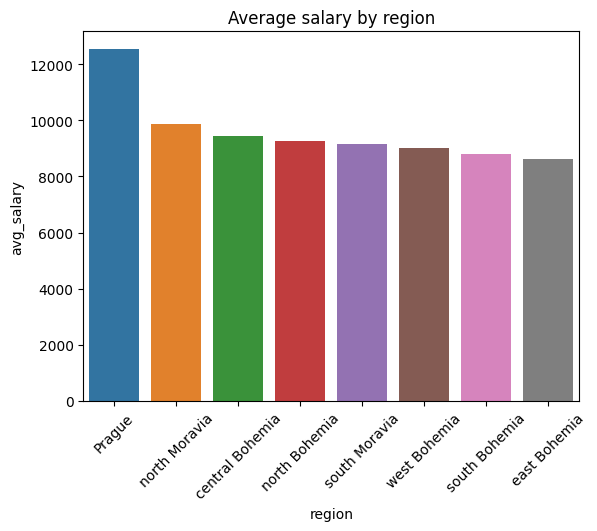

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
avg_sal = %sql SELECT * FROM average_salary
sns.barplot(x=avg_sal['region'], y=avg_sal['avg_salary'])
plt.xticks(rotation=45)
plt.title("Average salary by region")
plt.show()

<h2 align='center'>Sección 3: Introducción a GitHub Actions</h2>


<h3 align='center'> ¿Qué es GitHub Actions? </h3>

GitHub Actions es una herramienta de CI/CD (Integración Continua/Despliegue Continuo) integrada directamente en la plataforma GitHub.

Te permite automatizar, personalizar y ejecutar tus flujos de trabajo de desarrollo de software directamente en tu repositorio.



<h3 align='center'> Conceptos Clave </h3>

* **Flujo de trabajo (Workflow)**: Un flujo de trabajo es un procedimiento automatizado, definido por ti. Puede ser activado por varios eventos como un push, pull request, o incluso según un horario.
* **Trabajo (Job)**: Un flujo de trabajo puede tener múltiples trabajos. Los trabajos se ejecutan en paralelo por defecto, pero se pueden configurar para que dependan uno del otro.
* **Paso (Step)**: Cada trabajo tiene una serie de pasos. Un paso puede ser un conjunto de comandos para ejecutar, o una acción del mercado.
* **Acción (Action)**: Piezas de código reutilizables. Puedes crear las tuyas propias o usar acciones creadas por otros en la comunidad de GitHub.


<h3 align='center'> Ejemplos de flujos de trabajo </h3>

**Flujo de trabajo activado por un push o pull request:**

Este flujo de trabajo se activará cada vez que haya un push a la rama main. Es útil para la integración continua, asegurando que cualquier nuevo código empujado a la rama principal pase todas las pruebas.

`.github/workflows/on-push.yml`

```yaml
name: On Push/Pull Workflow to the main branch

on:
  push:
    branches: [ "main" ]
  pull_request:
    branches: [ "main" ]

permissions:
  contents: read

jobs:
  build:
    runs-on: ubuntu-latest

    steps:
    - uses: actions/checkout@v3
    - name: Set up Python 3.10
      uses: actions/setup-python@v3
      with:
        python-version: "3.10"
```

**Flujo de trabajo activado según un horario:**

Este flujo de trabajo se ejecuta en un momento programado, por ejemplo, todos los días a las 2 AM. Es útil para tareas rutinarias como compilaciones diarias o actualizaciones regulares de datos.
`.github/workflows/scheduled.yml`



```yaml
name: Scheduled Workflow

on:
  schedule:
    - cron: '0 2 * * *'  # This means 2 AM every day

jobs:
  routine-task:
    runs-on: ubuntu-latest

    steps:
    - name: Checkout code
      uses: actions/checkout@v3

    - name: Execute routine task
      run: |
        # Your commands for the routine task
```


<h2 align='center'>Sección 4: CI/CD de Procesos ETL con GitHub Actions </h2>

Uno de los principales usos de GitHub Actions es la automatización de pruebas, y en particular, la automatización del proceso conocido como Integración Continua, Despliegue Continuo.

Pasos clave:
1. Configurar pruebas para tu pipeline.
2. Configurar GitHub Action: incluir configuración del entorno, pruebas de la aplicación, mecanismo de despliegue.
3. Crear una nueva rama, hacer commits, crear un PR a la rama `main`.

![](images/cicd.jpg)

<h3 align='center'> Ejemplo de pruebas con pytest</h3>
Podemos crear una carpeta tests/ en el nivel raíz de nuestro repositorio de GitHub. Algunas pruebas de muestra:

`test_download`: esto imitará la primera etapa en nuestro pipeline de datos.

```python
import pytest
from unittest.mock import patch, Mock
import unittest
from pipeline.etl.extractdata import MarketData  

@pytest.fixture
def market_data():
    url = "https://tinyurl.com/jb-bank-m"
    output_folder = "test_output"
    return MarketData(url, output_folder)
```

<h3 align='center'> Ejemplo de pruebas con pytest</h3>

`test_download`: esto imitará la primera etapa en nuestro pipeline de datos.

```python
def test_extract(market_data):
    with patch('urllib.request.urlretrieve', return_value=('path_to_zip', None)) as MockUrlRetrieve, \
         patch('zipfile.ZipFile') as MockZip:

        mock_zip = Mock()
        MockZip.return_value.__enter__.return_value = mock_zip

        result = market_data.extract()

        MockUrlRetrieve.assert_called_once_with(market_data.url)
        MockZip.assert_called_once_with('path_to_zip', 'r')
        mock_zip.extractall.assert_called_once_with(market_data.output_folder)
        assert result == mock_zip
```

<h3 align='center'> Corriendo los tests de manera local</h3>


```bash
$ poetry run pytest
```

```bash
======================================= 2 passed in 0.05s =======================================
(etl-env) macpros-MacBook-Pro:automate-elt-github macpro$ poetry run pytest
====================================== test session starts ======================================
platform darwin -- Python 3.10.0, pytest-7.4.2, pluggy-1.3.0
rootdir: /Users/macpro/Documents/GitHub/automate-elt-github
plugins: anyio-4.0.0
collected 2 items                                                                               

tests/test_download.py ..                                                                 [100%]

======================================= 2 passed in 0.05s =======================================
```

<h3 align='center'> Añadiendo pruebas a GitHub Actions</h3>

```yaml
...

- name: Install dependencies
      run: |
        python -m pip install --upgrade pip
        pip install poetry 
        poetry lock
        poetry install --no-root
    - name: Set PYTHONPATH and Test with pytest  
      run: |
        export PYTHONPATH=$PYTHONPATH:$GITHUB_WORKSPACE/automate-elt-github/
        poetry run pytest
```

<h2 align='center'>Sección 5: Desplegando tu pipeline ETL/ELT en Amazon Redshift  </h2>

Amazon Redshift utiliza SQL para analizar datos estructurados y semi-estructurados a través de almacenes de datos, bases de datos operativas y lagos de datos, utilizando hardware diseñado por AWS y aprendizaje automático para ofrecer el mejor rendimiento de precio a cualquier escala.

![](images/redshift.png)


<h3 align='center'>Añadiendo la población de datos de Redshift a nuestro pipeline</h3>

Exploremos `redshift-data-population.ipynb`

https://github.com/lfunderburk/automate-elt-github/blob/main/pipeline/etl/redshift-data-population.ipynb

Podemos poblar una instancia de Redshift, siempre que tengamos:


```bash
REDSHIFT_USERNAME = "your-username"
REDSHIFT_PASSWORD = "your-password"
REDSHIFT_HOST = "default-workgroup.your-iam-role.your-zone.redshift-serverless.amazonaws.com"
IAM_role = "arn:aws:iam::your-iam-role:role/redshift-your-role-space"
```

Podemos definir lo anterior como variables de entorno, por ejemplo, en un archivo .env.

**Luego podemos almacenar estas variables como secretos en GitHub**

```yaml
name: Routine Data Fetch and Push to Redshift

on:
  schedule:
    - cron: '0 2 * * *'  # This means 2 AM every day

jobs:
  fetch-and-push:
    runs-on: ubuntu-latest

    steps:
    - uses: actions/checkout@v3
    - name: Set up Python 3.10
      uses: actions/setup-python@v3
      with:
        python-version: "3.10"

    - name: Install Poetry using pip
      run: |
        python -m pip install poetry

    - name: Install dependencies using Poetry
      run: |
        poetry install

    - name: Run Ploomber pipeline to fetch and push data to Redshift
      env:
        REDSHIFT_USERNAME: ${{ secrets.REDSHIFT_USER }}
        REDSHIFT_PASSWORD: ${{ secrets.REDSHIFT_PASS }}
        REDSHIFT_HOST: ${{ secrets.REDSHIFT_HOST }}
        IAM_role: ${{ secrets.IAM_role }}
      run: |
        cd pipeline
        poetry run ploomber build

```

<h3 align='center'>Reflexiones finales</h3>

En esta charla aprendimos:

1. Podemos habilitar la extracción de datos interactiva y el manejo de datos con SQL a través de JupySQL.
2. Podemos orquestar scripts de Python y cuadernos Jupyter a través de pipelines de Ploomber.
3. Podemos realizar pruebas automatizadas y CI/CD a través de GitHub actions.
4. Podemos desplegar nuestros pipelines a proveedores de servicios en la nube, como Amazon Redshift, a través de una 5. combinación de Ploomber y GitHub actions.